# Featurization and Model Tuning Project - Surendra Shukla

<b><u>Data Description:</b></u><br>
The actual concrete compressive strength (MPa) for a given mixture under a
specific age (days) was determined from laboratory. Data is in raw form (not scaled). The data has 8 quantitative input variables, and 1 quantitative output variable, and 1030 instances (observations).<br><br>
<b><u>Domain:</b></u><br>
Cement manufacturing <br><br>
<b><u>Context:</b></u><br>
Concrete is the most important material in civil engineering. The concrete compressive strength is a highly nonlinear function of age and ingredients. These ingredients include cement, blast furnace slag, fly ash, water, superplasticizer, coarse aggregate, and fine aggregate.<br><br>
<b><u>Attribute Information:</b></u><br>
 Cement : measured in kg in a m3 mixture<br>
 Blast : measured in kg in a m3 mixture<br>
 Fly ash : measured in kg in a m3 mixture<br>
 Water : measured in kg in a m3 mixture<br>
 Superplasticizer : measured in kg in a m3 mixture<br>
 Coarse Aggregate : measured in kg in a m3 mixture<br>
 Fine Aggregate : measured in kg in a m3 mixture<br>
 Age : day (1~365)<br>
 Concrete compressive strength measured in MPa<br><br>
<b><u>Learning Outcomes:</b></u><br>
 Exploratory Data Analysis<br>
 Building ML models for regression<br>
 Hyper parameter tuning<br><br>
<b><u>Objective:</b></u><br>
Modeling of strength of high performance concrete using Machine Learning

In [1]:
# Import necessary Libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt       # matplotlib.pyplot plots data
%matplotlib inline 
import seaborn as sns

In [2]:
#Library for Data Pre-processing
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
#sklearn models
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.decomposition import PCA
#Library for Model Evaluation - NOT NEEDED FOR REGRESSION PROBLEM
#from sklearn import metrics
#from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix, classification_report
#from sklearn.metrics import roc_auc_score, auc
#from sklearn.metrics import roc_curve
#Other Libraries
from collections import Counter
from itertools import combinations, product
from scipy import stats
from matplotlib.colors import ListedColormap
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import zscore

In [3]:
#Import all regressors 
from sklearn.impute import KNNImputer
from statsmodels.regression.linear_model import OLS
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn import svm
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.metrics import mean_squared_error, r2_score # Regressor's evaluation
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV #Kfold Cross Validation Score and GridSearch
from sklearn.utils import resample #re-sample which will be used for bootstrap sample. 

In [4]:
#Initiliaze dataframe used to collect model performance
import warnings
warnings.filterwarnings("ignore")
score_idx = 99
model_scores = pd.DataFrame({'Method':'Dummy',
                          'Model':'Dummy',
                            'Train Score':'NA',
                            'Test_Score':'NA',
                            'Test RMSE': 'NA',
                            'Test Rsquared':'NA',
                                        }, index=[score_idx])
score_idx = 0

In [5]:
# This function will be called to evaluate the model scores in a dataframe, which wil be used for comparison 
def model_score(method,model_name,model,X_train,y_train,X_test,y_test):
    
    global score_idx
    global model_scores
    
    score = pd.DataFrame({'Method':method,
                          'Model':model_name,
                            'Train Score':model.score(X_train,y_train),
                            'Test_Score':model.score(X_test,y_test),
                            'Test RMSE': np.sqrt(mean_squared_error(y_test, model.predict(X_test))),
                            'Test Rsquared':r2_score(y_test, model.predict(X_test)),
                                        }, index=[score_idx])
    score_idx +=1
    model_scores = pd.concat([model_scores,score])
     

### 1. Deliverable -1 (Exploratory data quality report reflecting the following)
<b><u>Univariate analysis </b></u><br>
i. Univariate analysis – data types and description of the
independent attributes which should include (name,
meaning, range of values observed, central values (mean
and median), standard deviation and quartiles, analysis of
the body of distributions / tails, missing values, outliers

In [6]:
#read data in a dataframe
con_df = pd.read_csv('concrete.csv')

In [7]:
#Check head of dataset
con_df.head(10)

,cement,slag,ash,water,superplastic,coarseagg,fineagg,age,strength
0,141.3,212.0,0.0,203.5,0.0,971.8,748.5,28,29.89
1,168.9,42.2,124.3,158.3,10.8,1080.8,796.2,14,23.51
2,250.0,0.0,95.7,187.4,5.5,956.9,861.2,28,29.22
3,266.0,114.0,0.0,228.0,0.0,932.0,670.0,28,45.85
4,154.8,183.4,0.0,193.3,9.1,1047.4,696.7,28,18.29
5,255.0,0.0,0.0,192.0,0.0,889.8,945.0,90,21.86
6,166.8,250.2,0.0,203.5,0.0,975.6,692.6,7,15.75
7,251.4,0.0,118.3,188.5,6.4,1028.4,757.7,56,36.64
8,296.0,0.0,0.0,192.0,0.0,1085.0,765.0,28,21.65
9,155.0,184.0,143.0,194.0,9.0,880.0,699.0,28,28.99


In [8]:
con_df.isin([0]).sum()

cement            0
slag            471
ash             566
water             0
superplastic    379
coarseagg         0
fineagg           0
age               0
strength          0
dtype: int64

#### Observation:

I see zero values in  columns, 'ash', 'superplastic' and 'slag'. I am not sure if these values are 'missing values' or is it possible to have zero for these columns. After basic google search, I believe we can have zero values for these columns. So I have decided not to treat these values. 

In [9]:
#Print Columns, and Shape
print(con_df.columns)
print('')
print('Total Rows = {}'.format(con_df.shape[0]))
print('Total Cols = {}'.format(con_df.shape[1]))

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age', 'strength'],
      dtype='object')

Total Rows = 1030
Total Cols = 9


In [10]:
con_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cement        1030 non-null   float64
 1   slag          1030 non-null   float64
 2   ash           1030 non-null   float64
 3   water         1030 non-null   float64
 4   superplastic  1030 non-null   float64
 5   coarseagg     1030 non-null   float64
 6   fineagg       1030 non-null   float64
 7   age           1030 non-null   int64  
 8   strength      1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.5 KB


In [11]:
con_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
cement,1030.0,281.167864,104.506364,102.00,192.375,272.900,350.000,540.0
slag,1030.0,73.895825,86.279342,0.00,0.000,22.000,142.950,359.4
ash,1030.0,54.188350,63.997004,0.00,0.000,0.000,118.300,200.1
water,1030.0,181.567282,21.354219,121.80,164.900,185.000,192.000,247.0
superplastic,1030.0,6.204660,5.973841,0.00,0.000,6.400,10.200,32.2
coarseagg,1030.0,972.918932,77.753954,801.00,932.000,968.000,1029.400,1145.0
fineagg,1030.0,773.580485,80.175980,594.00,730.950,779.500,824.000,992.6
age,1030.0,45.662136,63.169912,1.00,7.000,28.000,56.000,365.0
strength,1030.0,35.817961,16.705742,2.33,23.710,34.445,46.135,82.6


#### Observation:

Description for different columns. Large standard deviation in slag, ash and superplastic probably means that these columns are skewed  

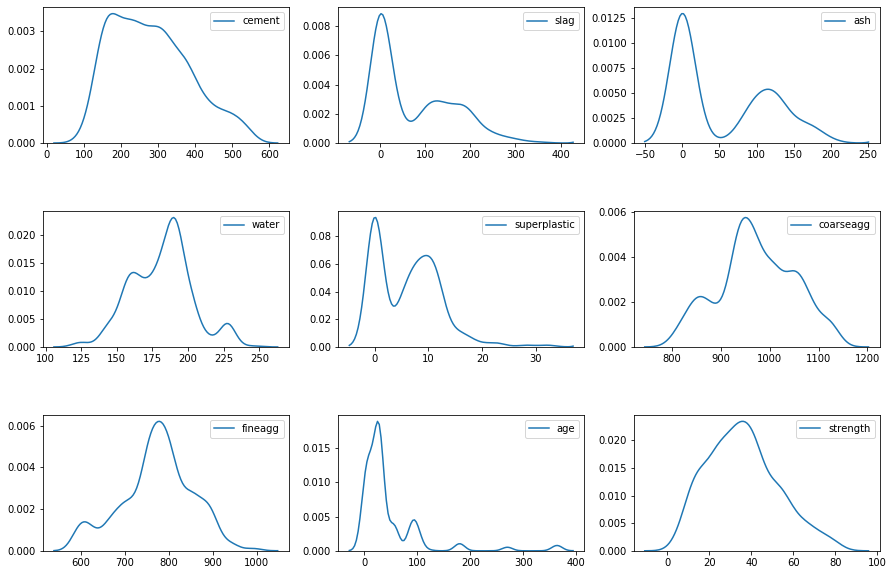

In [12]:
#Let us use seaborn distplot to analyze the distribution of our columns
f, ax = plt.subplots(3, 3, figsize=(15,10))
f.subplots_adjust(hspace=.5)
all_cols = con_df.columns
idx = 0
fg = sns.FacetGrid(con_df, legend_out=True)
for row in range(0,3):
    for col in range(0,3):
        fg.map(sns.kdeplot, all_cols[idx], ax=ax[row,col])
        ax[row,col].legend()
        idx += 1
        
plt.tight_layout(pad=6.0) 

fg.add_legend()
plt.close(2)
plt.show()

#We can see multiple gaussians, it appears there could be about 3-10 clusters in the dataset.

#### Observation:
cement is almost normal (slight skew to right)<br>
slag has two gausssians and rightly skewed. <br>
ash has two gaussians and rightly skewed.<br>
water has three guassians and slighly left skewed.<br>
superplastic has two gaussians and heavily rightly skewed.<br>
coarseagg has three guassians and almost normal.<br>
fineagg has almost two (or three) guassians and looks like normal.<br>
age has multiple guassians and rightly skewed.<br>
Strenght is almost normal. <br>

### Multivariate analysis 
Bi-variate analysis between the predictor variables and between the predictor variables and target column. Comment on your findings in terms of their relationship and degree of relation if any. Presence of leverage points. Visualize the analysis using boxplots and pair plots, histograms or density curves. Select the most appropriate attributes

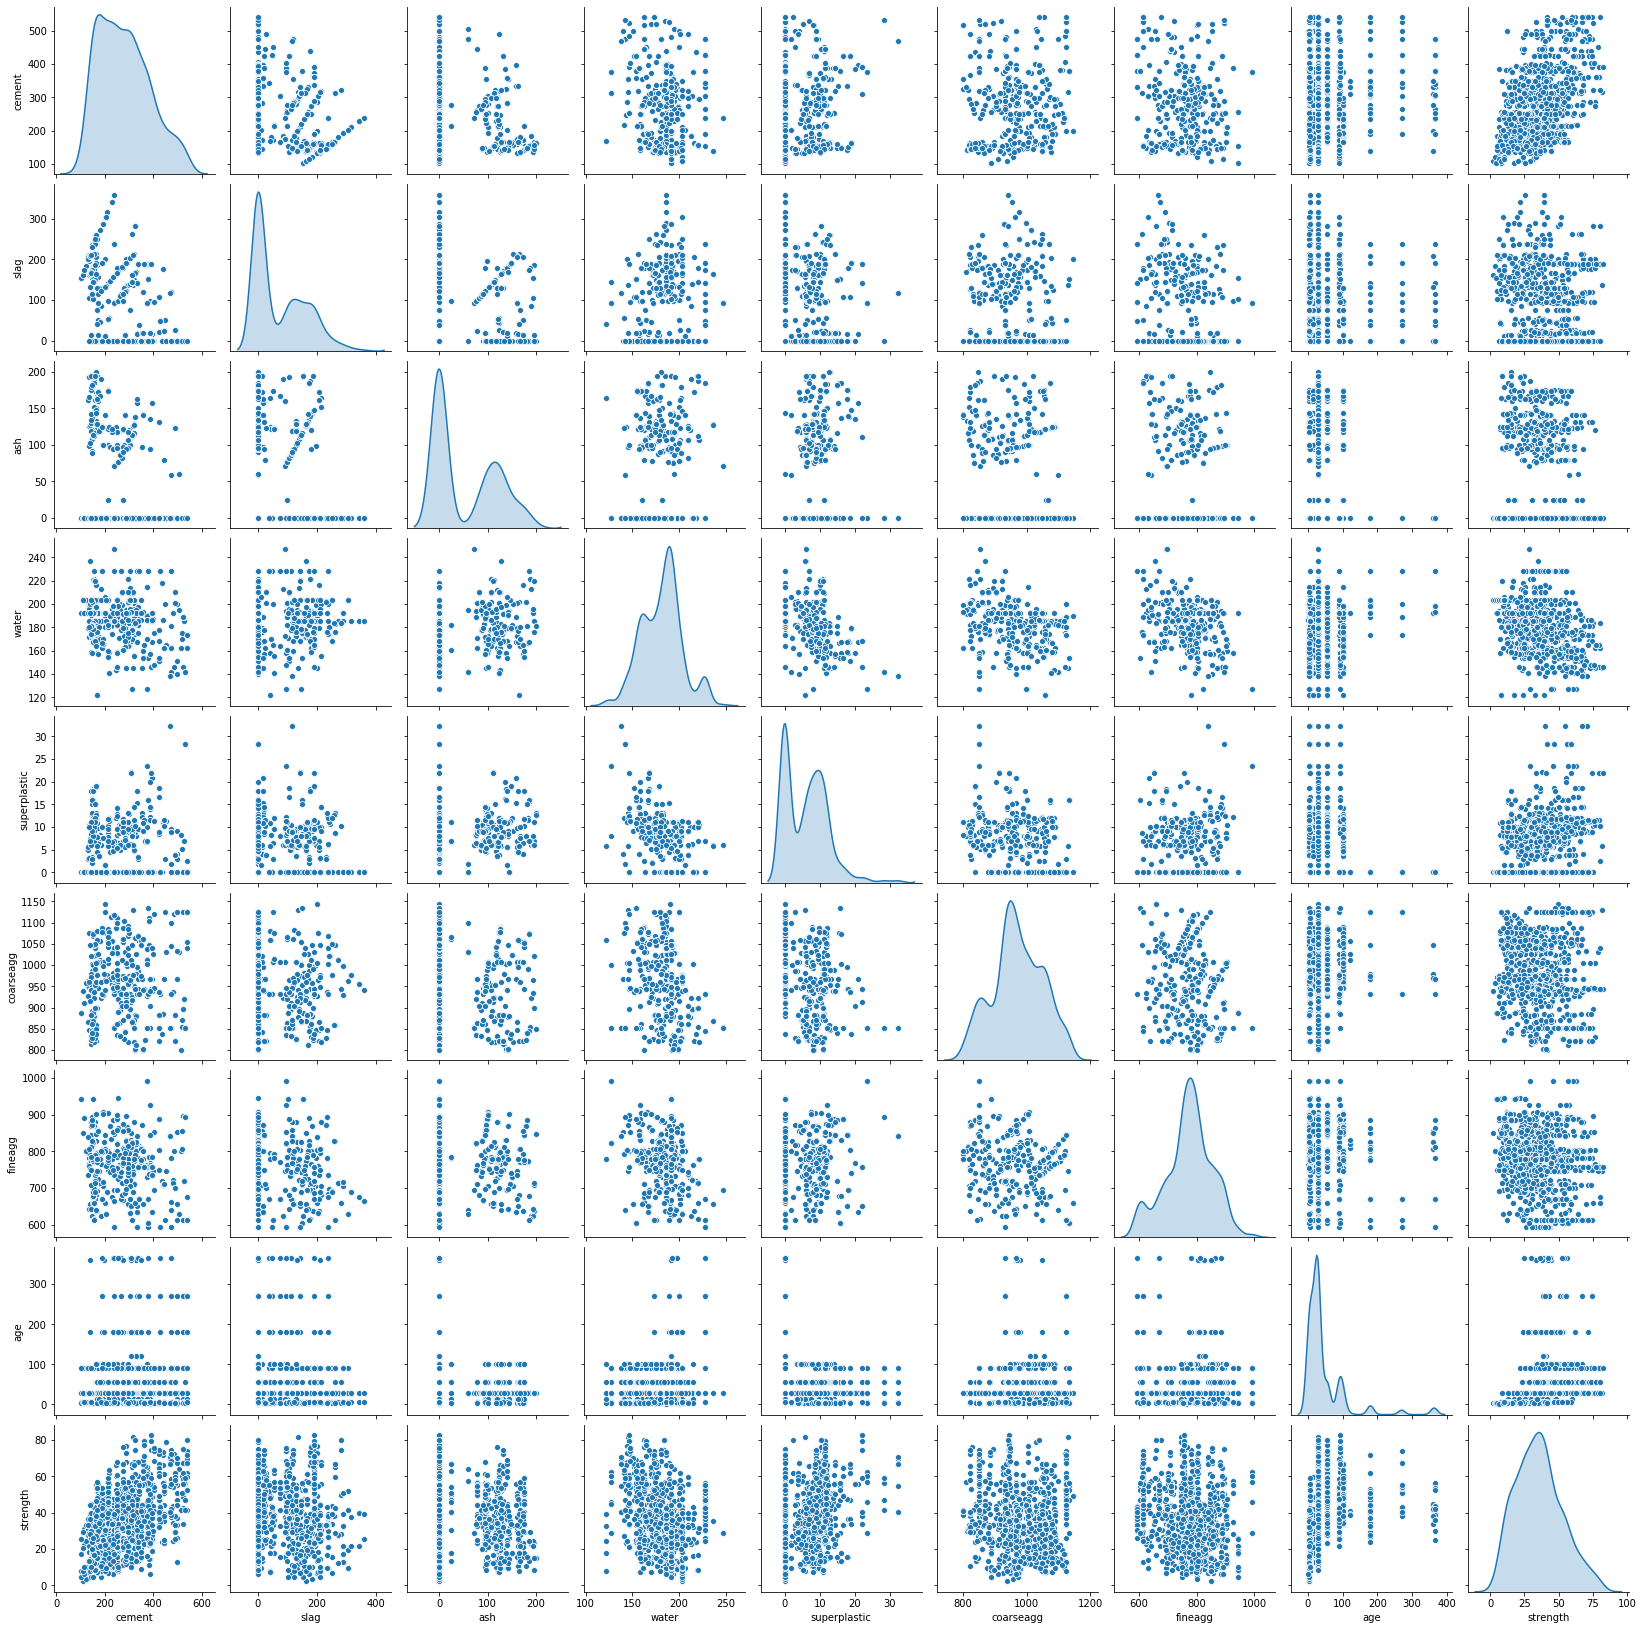

In [13]:
sns.pairplot(con_df,diag_kind='kde')
# This is pairplot before missing value treatment.

##### Observation:
<b>Diagonals Analysis</b> <br>
The diagonal gives the same information, we got in uni variant analysis. 

<b>Off Diagonal Analysis</b>
1. Most of the independent variables does not appear to have strong correlation with other variables. 
2. Fineagg and Coarseagg appear to have a slight Negative correlation. 
3. Superplastic and Water also has a negative coorelation 

<b>Relationship between dependent and independent attributes</b>
1. Strength appear to have positive correlation with cement, superplastic and age. 
2. Other independent variable does not seem to have much correlation with strength. 

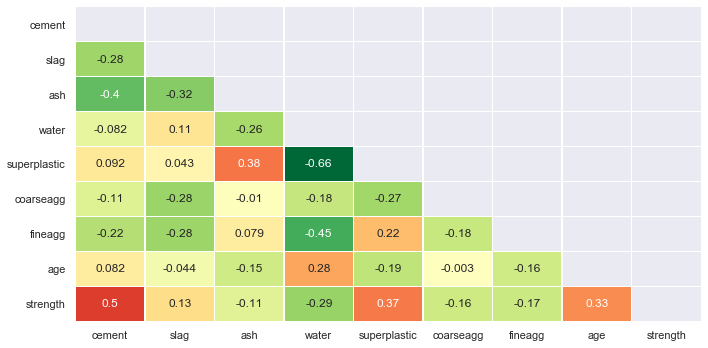

In [14]:
sns.set(font_scale=1)
corr = con_df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
plt.figure(figsize=(10,5))
ax = sns.heatmap(corr,
            annot=True,
            linewidths=.5,
            cmap = 'RdYlGn_r',
            center=0,
            mask = mask,
            cbar=False)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
ax.autoscale(tight=True)
plt.tight_layout()
plt.show()
# From correlation, it appears only cement and age has any meaningful impact on target variable. Also, slag and ash is not
# having any meaningful impact on target value. 

#### Observation: 

1. Following independent variables have negative correlation - Water and Superplastic, Slag and Ash, Water and Fineagg. ash and cement. 
2. None of the independent variable have any meaningful positive correlation 
3. Strength appear to have positive correlation with cement, superplastic and age. Negative correlation with water. 
4. Other independent variable does not have correlation with strength.

In [15]:
#Build a simple linear model on RAW data
score_idx = 0
X = con_df.iloc[:,0:8]
y = con_df['strength']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=.25, random_state=5)

X_train = X_train.apply(zscore) #Scaling after split to avoid data leakage. 
X_test = X_test.apply(zscore)



lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)
model_score('Raw Data','Simple Regression', lin_reg, X_train, y_train,X_test,y_test)
model_scores

,Method,Model,Train Score,Test_Score,Test RMSE,Test Rsquared
99,Dummy,Dummy,NA,NA,NA,NA
0,Raw Data,Simple Regression,0.612512,0.623973,10.1136,0.623973


##### Observation:
Simple linear model on RAW Data is not performing well - neither on Train nor on Test Data. RMSE is large. 

In [16]:
# As simple linear model is not performing,  Let me try to run Poly regression on Raw Data with degree = 2,3 and 4
for degree in [2,3,4]:
    
    poly_reg = PolynomialFeatures(degree = degree)
    X_poly = poly_reg.fit_transform(X)
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.fit_transform(X_test)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)
    model_score('Raw Data','Poly Reg '+str(degree), lin_reg, X_train_poly, y_train,X_test_poly,y_test) 

model_scores   
    
    

,Method,Model,Train Score,Test_Score,Test RMSE,Test Rsquared
99,Dummy,Dummy,NA,NA,NA,NA
0,Raw Data,Simple Regression,0.612512,0.623973,10.1136,0.623973
1,Raw Data,Poly Reg 2,0.81421,0.770331,7.90402,0.770331
2,Raw Data,Poly Reg 3,0.931916,0.814243,7.10837,0.814243
3,Raw Data,Poly Reg 4,0.984931,-132.744,190.737,-132.744


#### Observation
1. Quadratic Model has improved the performance a lot, but still test score is less than 80%.
2. Polynomial with degree 3 makes the test score 81%, but overfits the model slightly. 
3. Any higher degree is massive overfit. 
4. Conclusion - We will see if we can improve the score by different techniques. 


### Pick one strategy to address the presence outliers and missing values and perform necessary imputation

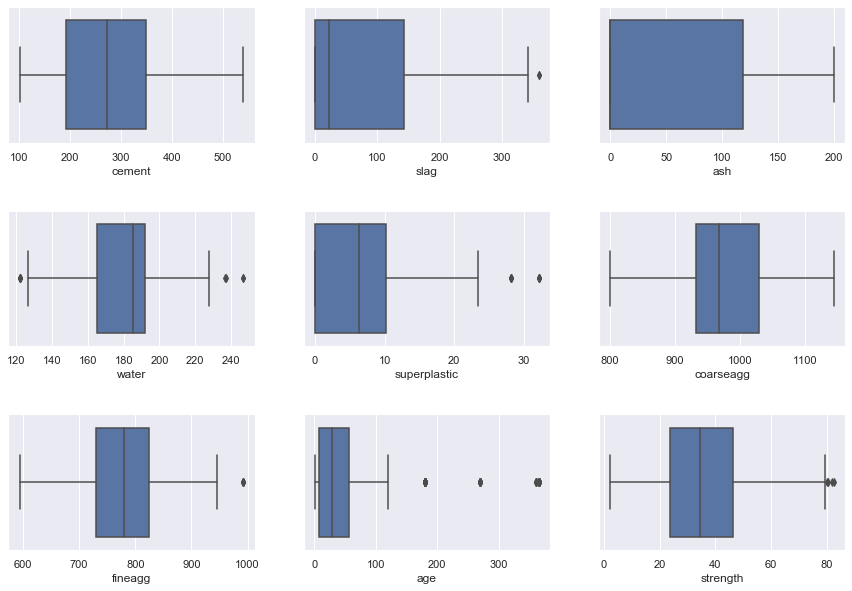

In [17]:
#Boxplot before outlier treatment

f, ax = plt.subplots(3, 3, figsize=(15,10))
f.subplots_adjust(hspace=.5)
all_cols = con_df.columns
idx = 0
fg = sns.FacetGrid(con_df)
for row in range(0,3):
    for col in range(0,3):
        fg.map(sns.boxplot, all_cols[idx], ax=ax[row,col])
        idx += 1
        
plt.tight_layout(pad=6.0) 


plt.close(2)
plt.show();
#We see outliers in multiple features

##### Observation:
1. Follwoing features have outliers: Slag, water, superplastic, fineagg, age. 

In [18]:
# Outlier Treatment
def find_outliers(data,name):
    """ This Function counts and prints outlier in a data set. 
    Any datapoint out side +/- 2 std. deviation is outlier """
    median, std = np.median(data), np.std(data)
    outlier = (data-median).abs() > 2*std
            
    print (' {} = There are total {} ({:0.2f}%) outliers'.format(name,
                                                data[outlier].count(), 
                                                data[outlier].count()*100/len(data)))

In [19]:
#replace Outliers
def replace_outliers(data,name):
    """ The function replces the outliers ( any thing outside 2 std. deviation)
        with median. """
    median, std = np.median(data), np.std(data)
    outlier = (data-median).abs() > 2*std
    data[outlier] = median           
  

In [20]:
# Replace the outlier with Median 
con_df_features = con_df.iloc[:,:-1]
iteration = 0
while iteration < 1:
    i=-1
    for cols in con_df_features.columns:
        i = i + 1   
        if con_df_features[cols].dtype != 'object':
            find_outliers(con_df_features[cols],con_df_features.columns[i])

    i=-1
    for cols in con_df_features.columns:
        i = i + 1   
        if con_df_features[cols].dtype != 'object':
            replace_outliers(con_df_features[cols],con_df_features.columns[i])
            
    iteration += 1

 cement = There are total 49 (4.76%) outliers
 slag = There are total 99 (9.61%) outliers
 ash = There are total 153 (14.85%) outliers
 water = There are total 87 (8.45%) outliers
 superplastic = There are total 31 (3.01%) outliers
 coarseagg = There are total 41 (3.98%) outliers
 fineagg = There are total 83 (8.06%) outliers
 age = There are total 59 (5.73%) outliers


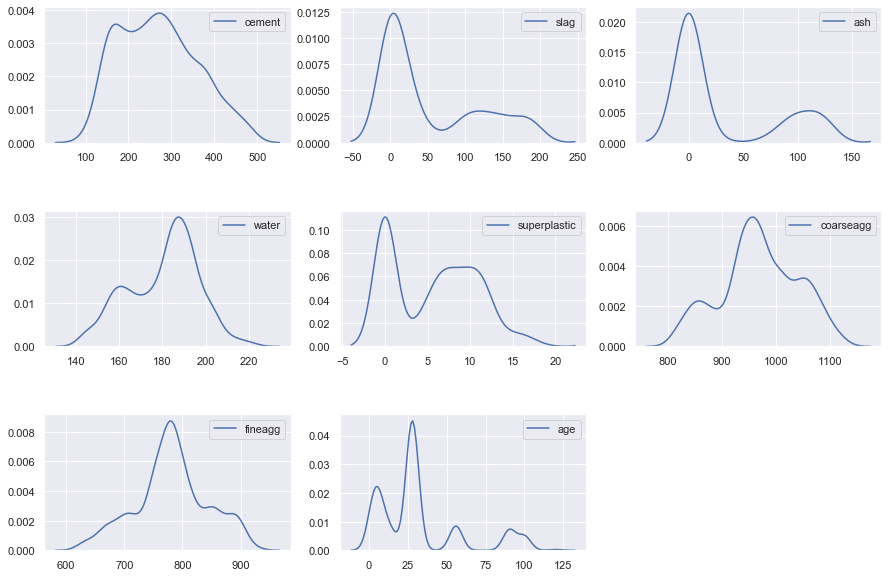

In [21]:
#Kde plot after outlier treatment 
f, ax = plt.subplots(3, 3, figsize=(15,10))
f.subplots_adjust(hspace=.5)
all_cols = con_df_features.columns
idx = 0
fg = sns.FacetGrid(con_df_features, legend_out=True)
for row in range(0,3):
    for col in range(0,3):
        if idx >= 8:
            ax[row,col].set_visible(False)
        else:
            
            fg.map(sns.kdeplot, all_cols[idx], ax=ax[row,col])
            ax[row,col].legend()
            idx += 1
        
plt.tight_layout(pad=6.0) 

fg.add_legend()
plt.close(2)
plt.show()

#### Observation:
Long tails have become guaussians due to removal of outliers. 

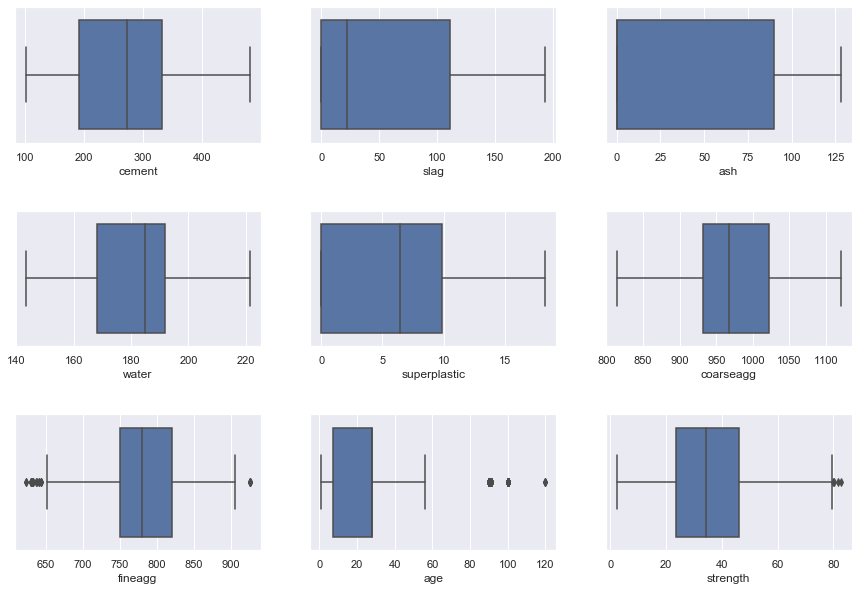

In [22]:
#Boxplot after outliers removed

con_df_treated = con_df_features.join(pd.DataFrame(con_df['strength']))
f, ax = plt.subplots(3, 3, figsize=(15,10))
f.subplots_adjust(hspace=.5)
all_cols = con_df_treated.columns
idx = 0
fg = sns.FacetGrid(con_df_treated)
for row in range(0,3):
    for col in range(0,3):
        fg.map(sns.boxplot, all_cols[idx], ax=ax[row,col])
        idx += 1
        
plt.tight_layout(pad=6.0) 


plt.close(2)
plt.show();
#We see outliers in multiple features

#### Observation:

Outliers are removed from slag, water and Superplastic. Fot age, and fineagg, not removed completely, but came close to median.

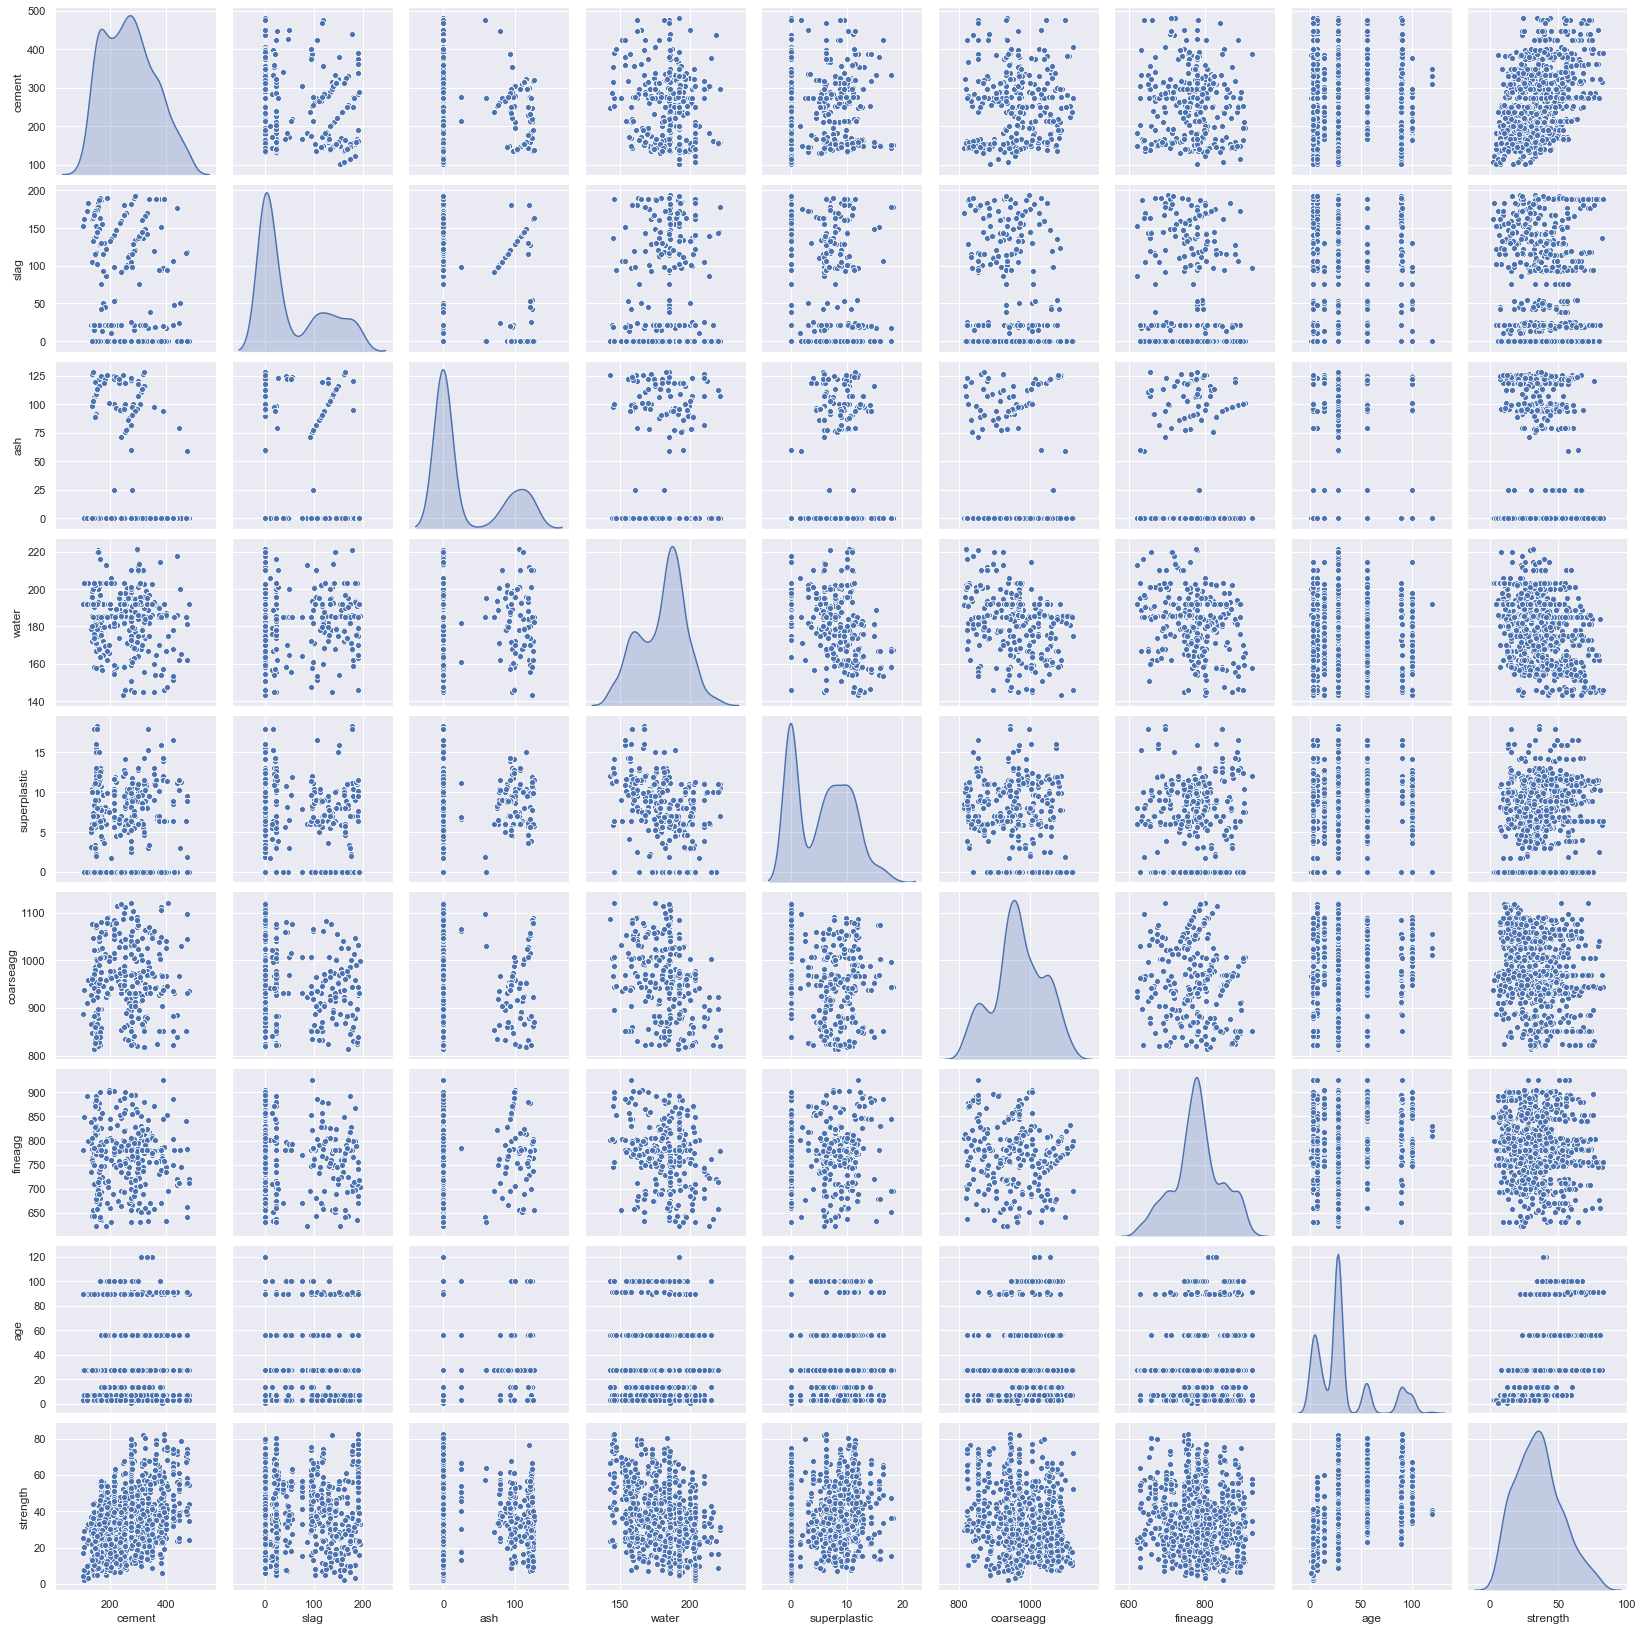

In [23]:

sns.pairplot(con_df_treated,diag_kind='kde')
#pairplot after outlier treatment

In [24]:
#Build a simple linear model after outlier treatment
X = con_df_treated.iloc[:,:-1]
y = con_df_treated['strength']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=.25, random_state=5)

X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)

method = 'outlier removed'

model_score(method,'Simple Regression', lin_reg, X_train, y_train,X_test,y_test)
model_scores


,Method,Model,Train Score,Test_Score,Test RMSE,Test Rsquared
99,Dummy,Dummy,NA,NA,NA,NA
0,Raw Data,Simple Regression,0.612512,0.623973,10.1136,0.623973
1,Raw Data,Poly Reg 2,0.81421,0.770331,7.90402,0.770331
2,Raw Data,Poly Reg 3,0.931916,0.814243,7.10837,0.814243
3,Raw Data,Poly Reg 4,0.984931,-132.744,190.737,-132.744
4,outlier removed,Simple Regression,0.637599,0.682877,9.28776,0.682877


#### Observation:
For Simple Regression, train and test score both have improved slightly after removing outlier. 

In [25]:
#Run Polynomial model with degree =2,3,4,5. 
for degree in [2,3,4,5]:    
    poly_reg = PolynomialFeatures(degree = degree)
    X_poly = poly_reg.fit_transform(X)
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.fit_transform(X_test)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)
    model_score(method,'Poly Reg '+str(degree), lin_reg, X_train_poly, y_train,X_test_poly,y_test) 

model_scores
    

,Method,Model,Train Score,Test_Score,Test RMSE,Test Rsquared
99,Dummy,Dummy,NA,NA,NA,NA
0,Raw Data,Simple Regression,0.612512,0.623973,10.1136,0.623973
1,Raw Data,Poly Reg 2,0.81421,0.770331,7.90402,0.770331
2,Raw Data,Poly Reg 3,0.931916,0.814243,7.10837,0.814243
3,Raw Data,Poly Reg 4,0.984931,-132.744,190.737,-132.744
4,outlier removed,Simple Regression,0.637599,0.682877,9.28776,0.682877
5,outlier removed,Poly Reg 2,0.784089,0.784247,7.66083,0.784247
6,outlier removed,Poly Reg 3,0.881935,0.68442,9.26514,0.68442
7,outlier removed,Poly Reg 4,0.982731,-1412.05,619.978,-1412.05
8,outlier removed,Poly Reg 5,0.990459,-1.91445e+18,2.28202e+10,-1.91445e+18


##### Observation:
After removing outliers, though overfit has reduced. But, overall model performance has also reduced. For degree greater than 3, the model remains massive overfit. 

In [26]:
#See if we can remove some features
X2 = add_constant(X)
est = OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     236.1
Date:                Sun, 14 Jun 2020   Prob (F-statistic):          4.19e-226
Time:                        15:22:30   Log-Likelihood:                -3821.9
No. Observations:                1030   AIC:                             7662.
Df Residuals:                    1021   BIC:                             7706.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          178.6020     12.140     14.712   

### Identify opportunities (if any) to create a composite feature, drop a feature etc
We can see that ash and superplastic does not have impact on target variable, I will drop these features

### Decide on complexity of the model, should it be simple linear model in terms of parameters or would a quadratic or higher degree help

In [27]:
#Drop in-singnificant columns per p value >= .05
X = con_df_treated[['cement','slag','water','coarseagg','fineagg','age']]
y = con_df['strength']

X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=.25, random_state=5)

X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)



lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)
y_pred = lin_reg.predict(X_test)

method = 'Feature Reduction'

model_score(method,'Simple Regression', lin_reg, X_train, y_train,X_test,y_test)
model_scores



,Method,Model,Train Score,Test_Score,Test RMSE,Test Rsquared
99,Dummy,Dummy,NA,NA,NA,NA
0,Raw Data,Simple Regression,0.612512,0.623973,10.1136,0.623973
1,Raw Data,Poly Reg 2,0.81421,0.770331,7.90402,0.770331
2,Raw Data,Poly Reg 3,0.931916,0.814243,7.10837,0.814243
3,Raw Data,Poly Reg 4,0.984931,-132.744,190.737,-132.744
4,outlier removed,Simple Regression,0.637599,0.682877,9.28776,0.682877
5,outlier removed,Poly Reg 2,0.784089,0.784247,7.66083,0.784247
6,outlier removed,Poly Reg 3,0.881935,0.68442,9.26514,0.68442
7,outlier removed,Poly Reg 4,0.982731,-1412.05,619.978,-1412.05
8,outlier removed,Poly Reg 5,0.990459,-1.91445e+18,2.28202e+10,-1.91445e+18


#### Observation:
Feature reduction has made very slight improvement to Test Score for simple regression. 

In [28]:
for degree in [2,3,4]:    
    poly_reg = PolynomialFeatures(degree = degree)
    X_poly = poly_reg.fit_transform(X)
    X_train_poly = poly_reg.fit_transform(X_train)
    X_test_poly = poly_reg.fit_transform(X_test)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_train)
    model_score(method,'Poly Reg '+str(degree), lin_reg, X_train_poly, y_train,X_test_poly,y_test) 

model_scores
    

,Method,Model,Train Score,Test_Score,Test RMSE,Test Rsquared
99,Dummy,Dummy,NA,NA,NA,NA
0,Raw Data,Simple Regression,0.612512,0.623973,10.1136,0.623973
1,Raw Data,Poly Reg 2,0.81421,0.770331,7.90402,0.770331
2,Raw Data,Poly Reg 3,0.931916,0.814243,7.10837,0.814243
3,Raw Data,Poly Reg 4,0.984931,-132.744,190.737,-132.744
4,outlier removed,Simple Regression,0.637599,0.682877,9.28776,0.682877
5,outlier removed,Poly Reg 2,0.784089,0.784247,7.66083,0.784247
6,outlier removed,Poly Reg 3,0.881935,0.68442,9.26514,0.68442
7,outlier removed,Poly Reg 4,0.982731,-1412.05,619.978,-1412.05
8,outlier removed,Poly Reg 5,0.990459,-1.91445e+18,2.28202e+10,-1.91445e+18


#### Observation:
1. After dropping in-significant columns, I see good improvement in test score for degree =3. Test score is improved, and also RMSE is reduced.

In [29]:
#Let me now try PCA
X = con_df_treated.iloc[:,:-1]
y = con_df_treated['strength']

X_normal = X.apply(zscore)

pca = PCA(n_components=8)
pca.fit(X_normal)
# the "cumulative variance explained" analysis 
tot = sum(pca.explained_variance_)

var_exp = [( i /tot ) * 100 for i in sorted(pca.explained_variance_, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 24.22234943  43.00862201  57.0977971   69.47047475  81.32609501
  91.97583293  97.29571179 100.        ]


In [30]:
#first 7 components explain most of the variation
pca = PCA(n_components=7)
pca.fit(X_normal)   
X_pca = pca.transform(X_normal)
X_pca_train, X_pca_test, y_pca_train, y_pca_test =train_test_split(X_pca, y, test_size=.25, random_state=5)


In [31]:
#Linear Model with PCA
lin_reg = LinearRegression()
lin_reg.fit(X_pca_train,y_pca_train)
y_pred = lin_reg.predict(X_pca_test)

method = 'PCA'

model_score(method,'Simple Regression', lin_reg, X_pca_train, y_pca_train,X_pca_test,y_pca_test)
model_scores

,Method,Model,Train Score,Test_Score,Test RMSE,Test Rsquared
99,Dummy,Dummy,NA,NA,NA,NA
0,Raw Data,Simple Regression,0.612512,0.623973,10.1136,0.623973
1,Raw Data,Poly Reg 2,0.81421,0.770331,7.90402,0.770331
2,Raw Data,Poly Reg 3,0.931916,0.814243,7.10837,0.814243
3,Raw Data,Poly Reg 4,0.984931,-132.744,190.737,-132.744
4,outlier removed,Simple Regression,0.637599,0.682877,9.28776,0.682877
5,outlier removed,Poly Reg 2,0.784089,0.784247,7.66083,0.784247
6,outlier removed,Poly Reg 3,0.881935,0.68442,9.26514,0.68442
7,outlier removed,Poly Reg 4,0.982731,-1412.05,619.978,-1412.05
8,outlier removed,Poly Reg 5,0.990459,-1.91445e+18,2.28202e+10,-1.91445e+18


#### Observation:
PCA has reduced the performance of Liner model. 

In [32]:
for degree in [2,3,4]:    
    poly_reg = PolynomialFeatures(degree = degree)
    X_poly = poly_reg.fit_transform(X_pca)
    X_train_poly = poly_reg.fit_transform(X_pca_train)
    X_test_poly = poly_reg.fit_transform(X_pca_test)
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_poly, y_pca_train)
    model_score(method,'Poly Reg '+str(degree), lin_reg, X_train_poly, y_pca_train,X_test_poly,y_pca_test) 

model_scores
    

,Method,Model,Train Score,Test_Score,Test RMSE,Test Rsquared
99,Dummy,Dummy,NA,NA,NA,NA
0,Raw Data,Simple Regression,0.612512,0.623973,10.1136,0.623973
1,Raw Data,Poly Reg 2,0.81421,0.770331,7.90402,0.770331
2,Raw Data,Poly Reg 3,0.931916,0.814243,7.10837,0.814243
3,Raw Data,Poly Reg 4,0.984931,-132.744,190.737,-132.744
4,outlier removed,Simple Regression,0.637599,0.682877,9.28776,0.682877
5,outlier removed,Poly Reg 2,0.784089,0.784247,7.66083,0.784247
6,outlier removed,Poly Reg 3,0.881935,0.68442,9.26514,0.68442
7,outlier removed,Poly Reg 4,0.982731,-1412.05,619.978,-1412.05
8,outlier removed,Poly Reg 5,0.990459,-1.91445e+18,2.28202e+10,-1.91445e+18


#### Observation:
PCA has not helped much with polynomial. For degree = 3, the test score has improved a bit post PCA, but still this score less than 80%. 

### Explore for gaussians. If data is likely to be a mix of gaussians, explore individual clusters and present your findings in terms of the independent attributes and their suitability to predict strength

In [33]:
#We will look at the different clusters in dataset, and how the Independent variable in a cluster influence the target varibale
cluster_range = range( 2, 12 )   # expect 4 to 6 clusters from the pair panel visual inspection hence restricting from 2 to 8
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 5)
  clusters.fit(con_df_features)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append( clusters.inertia_ )
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df

,num_clusters,cluster_errors
0,2,1.920445e+07
1,3,1.571179e+07
2,4,1.378857e+07
3,5,1.213772e+07
4,6,1.105873e+07
5,7,1.031314e+07
6,8,9.415375e+06
7,9,8.683335e+06
8,10,8.090375e+06
9,11,7.690414e+06


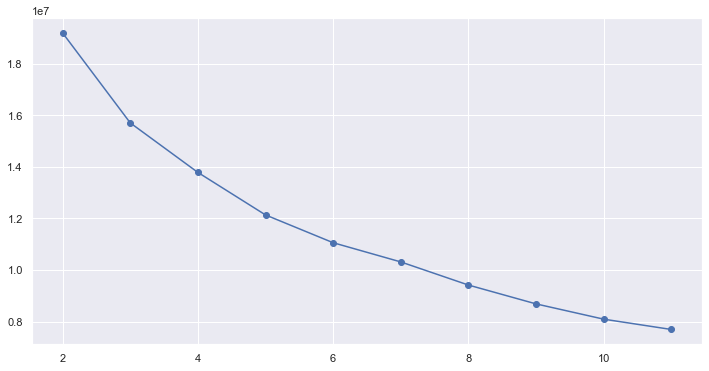

In [34]:
# Elbow plot

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

#The dataset has 3-5 clusters. as evident by pairplot

In [35]:
#Looks like we have 3 to 5 clusters. Let is analyze if we can find these clusters. I will start with 4. 
con_df_attr = con_df_treated.loc[:,:]
con_df_attr_z = con_df_attr.apply(zscore)

cluster = KMeans( n_clusters = 4, random_state = 1 )
cluster.fit(con_df_attr_z)

prediction=cluster.predict(con_df_attr_z)
con_df_attr_z["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record

con_df_attr_z_copy = con_df_attr_z.copy(deep = True)  # Creating a mirror copy for later re-use instead of building repeatedly

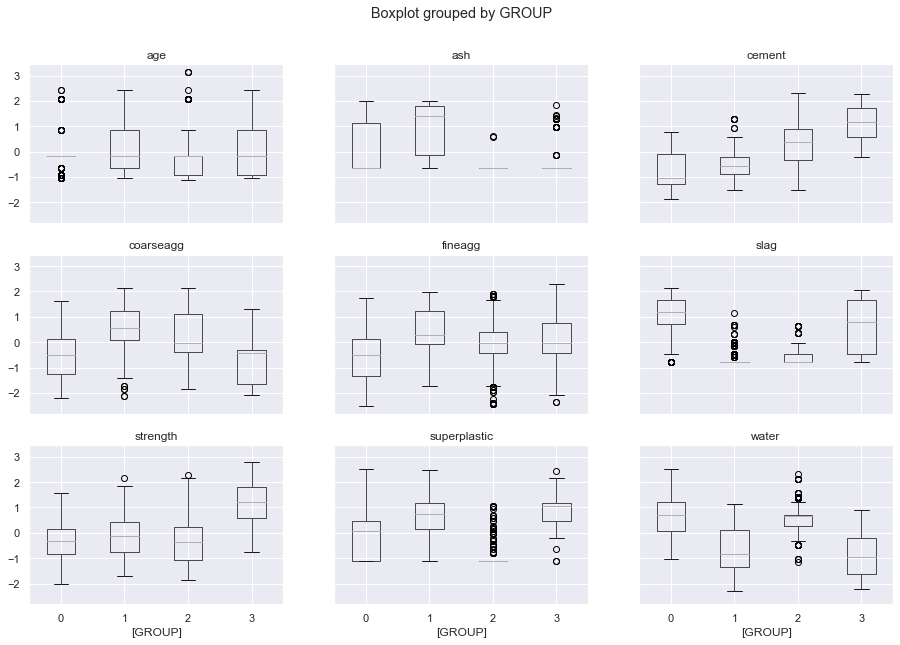

In [36]:
con_df_attr_z.boxplot(by = 'GROUP',figsize=(15,10));

In [37]:
# Addressing outliers at group level

data = con_df_attr_z   # lazy to type long names. Renaming it to data. Remember data is not a copy of the dataframe
       
def replace(group):
    median, std = group.median(), group.std()  #Get the median and the standard deviation of every group 
    outliers = (group - median).abs() > 2*std # Subtract median from every member of each group. Take absolute values > 2std
    group[outliers] = group.median()       
    return group

data_corrected = (data.groupby('GROUP').transform(replace)) 
concat_data = data_corrected.join(pd.DataFrame(con_df_attr_z['GROUP']))


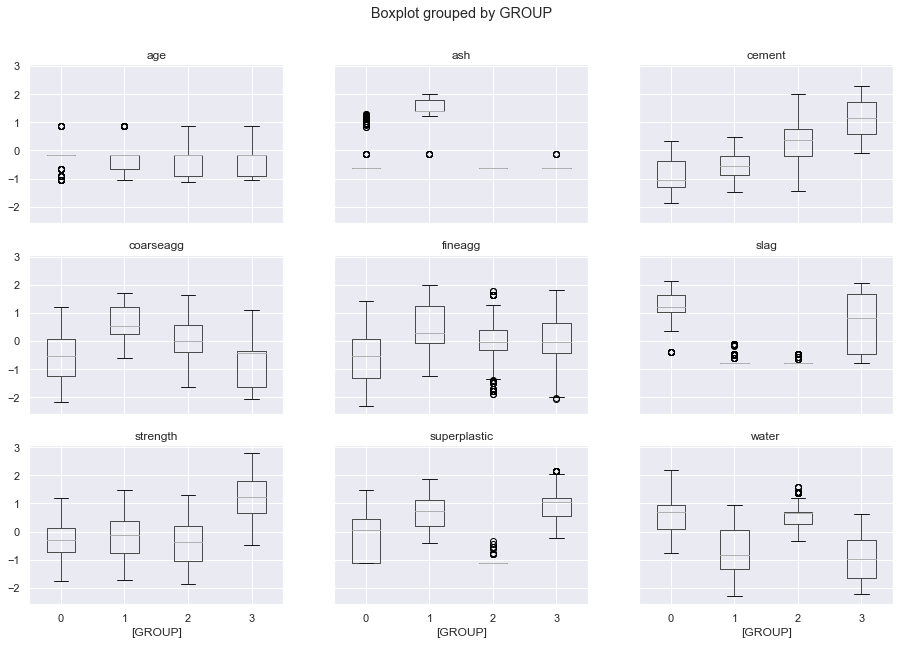

In [38]:
concat_data.boxplot(by = 'GROUP',figsize=(15,10));

#### Observation
K-mean clustering seems to be not helping. There are no clearly defnied clusters as there are lot of overlap. 

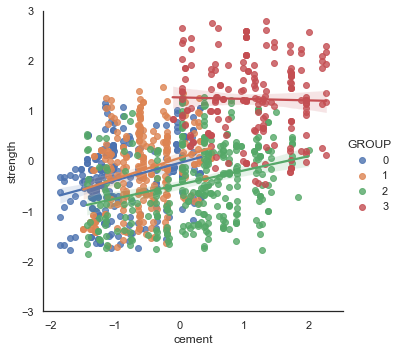

In [39]:
var = 'cement'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP');
plot.set(ylim = (-3,3))

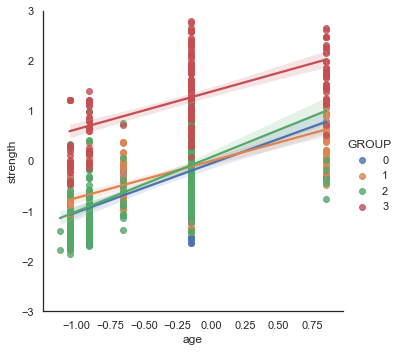

In [40]:
var = 'age'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

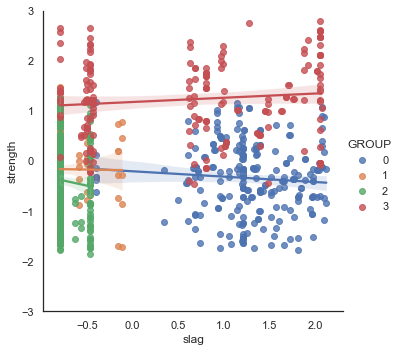

In [41]:
var = 'slag'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

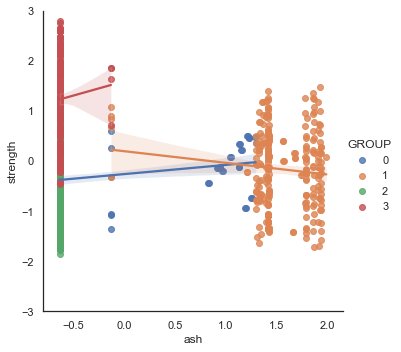

In [42]:
var = 'ash'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

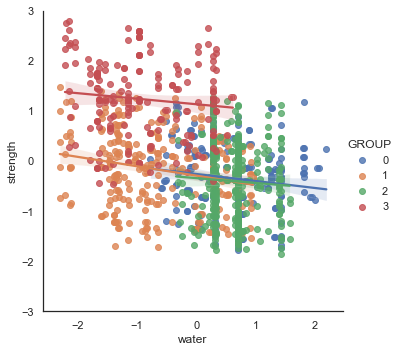

In [43]:
var = 'water'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

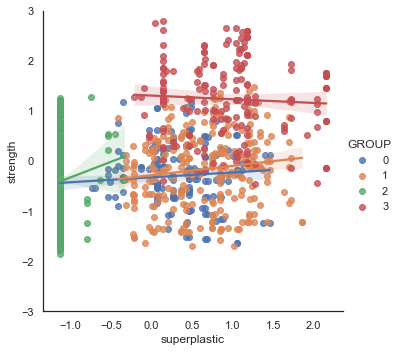

In [44]:
var = 'superplastic'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

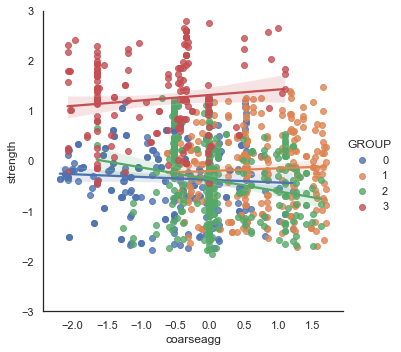

In [45]:
var = 'coarseagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

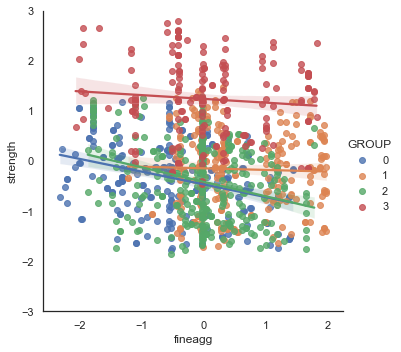

In [46]:
var = 'fineagg'

with sns.axes_style("white"):
    plot = sns.lmplot(var,'strength',data=concat_data,hue='GROUP')
plot.set(ylim = (-3,3))

#### Observation:
K-means clustering is not helping. For most of the features, there appears to be no correlation with target variable within clusters. 

### Obtain feature importance for the individual features and present your findings

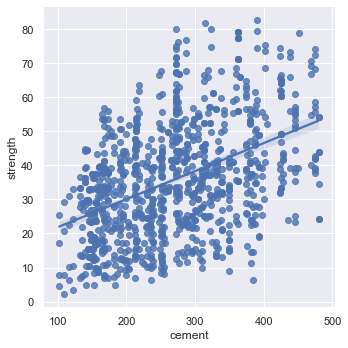

In [47]:
#First Let us plot the features against the target variable
# Strength vs cement
sns.lmplot(x="cement",y="strength",data=con_df_treated)
plt.show()

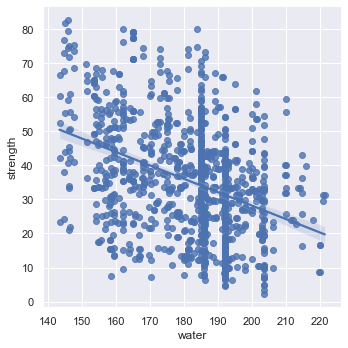

In [48]:
sns.lmplot(x="water",y="strength",data=con_df_treated)
plt.show()

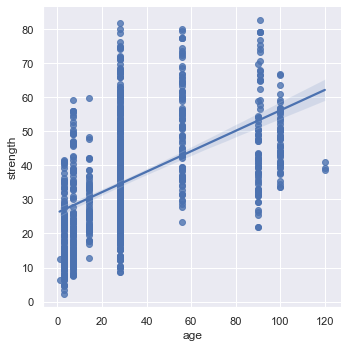

In [49]:
sns.lmplot(x="age",y="strength",data=con_df_treated)
plt.show()

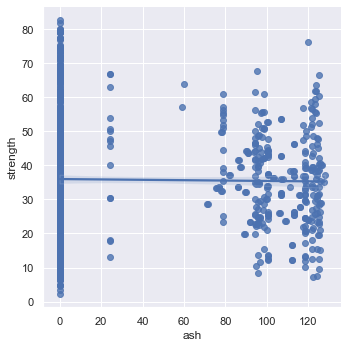

In [50]:
sns.lmplot(x="ash",y="strength",data=con_df_treated)
plt.show()

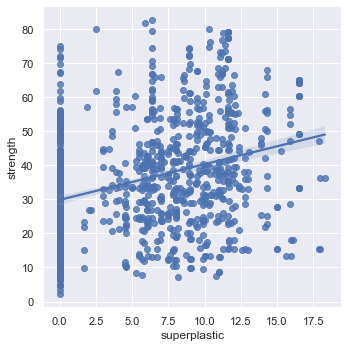

In [51]:
sns.lmplot(x="superplastic",y="strength",data=con_df_treated)
plt.show()

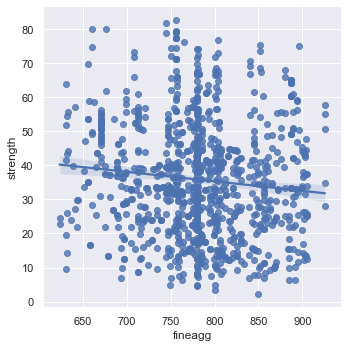

In [52]:
sns.lmplot(x="fineagg",y="strength",data=con_df_treated)
plt.show()

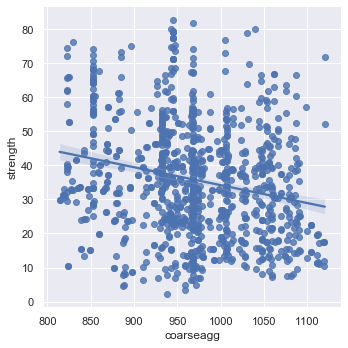

In [53]:
sns.lmplot(x="coarseagg",y="strength",data=con_df_treated)
plt.show()

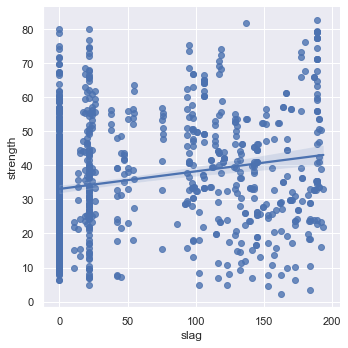

In [54]:
sns.lmplot(x="slag",y="strength",data=con_df_treated)
plt.show()

##### Observation:
1. Looking at the slope of line, it appears that Cement, water, age and Superplastic are important features in determination of target variable. 

In [55]:
# Feature Importance for DecisionTree Regressor

X = con_df_treated.iloc[:,:-1]
y = con_df_treated['strength']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=.25, random_state=5)

X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

regressor = DecisionTreeRegressor(random_state=0, max_depth=4)

regressor.fit(X_train , y_train)
feature_importances = regressor.feature_importances_


feature_names = con_df_features.columns
print(feature_names)

feat_imp_dict = dict(zip(feature_names, regressor.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')


,0
age,0.447383
cement,0.267995
water,0.110778
superplastic,0.079657
slag,0.060840
ash,0.033348
coarseagg,0.000000
fineagg,0.000000


In [56]:
# Feature Importance for DecisionTree Regressor
regressor = GradientBoostingRegressor(random_state=0)

regressor.fit(X_train , y_train)
feature_importances = regressor.feature_importances_


feature_names = con_df_features.columns
print(feature_names)

feat_imp_dict = dict(zip(feature_names, regressor.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

Index(['cement', 'slag', 'ash', 'water', 'superplastic', 'coarseagg',
       'fineagg', 'age'],
      dtype='object')


,0
age,0.369843
cement,0.291530
water,0.126816
slag,0.072722
superplastic,0.070219
fineagg,0.034491
coarseagg,0.021183
ash,0.013196


In [57]:
#Feature Importance for Simple linear Regression

est = OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:               strength   R-squared:                       0.649
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     236.1
Date:                Sun, 14 Jun 2020   Prob (F-statistic):          4.19e-226
Time:                        15:23:25   Log-Likelihood:                -3821.9
No. Observations:                1030   AIC:                             7662.
Df Residuals:                    1021   BIC:                             7706.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          178.6020     12.140     14.712   

#### Observation:
    
After looking the result for three algorithms above, water, cement and age are most significant features consistently.  

### Algorithms that you think will be suitable for this project

In [58]:
#Liner model will not work with this dataset, as most of the features, for various clusters showing no linear relationship
# I will try other regressors 

X = con_df.iloc[:,:-1]
y = con_df['strength']
X_train, X_test, y_train, y_test =train_test_split(X, y, test_size=.25, random_state=5)

X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

names = ['Ridge Regression', 'Lasso Regression',
         'K Neighbors Regressor', 'Decision Tree Regressor', 
         'Random Forest Regressor', 'Gradient Boosting Regressor',
         'Adaboost Regressor']
models = [Ridge(), Lasso(),
          KNeighborsRegressor(), DecisionTreeRegressor(),
          RandomForestRegressor(), GradientBoostingRegressor(), 
          AdaBoostRegressor()]

method = 'Model Selection'
for name, model in zip(names,models):
    temp_model = model
    temp_model.fit(X_train,y_train)
    model_score(method, name, model, X_train, y_train,X_test,y_test)

model_scores
    

,Method,Model,Train Score,Test_Score,Test RMSE,Test Rsquared
99,Dummy,Dummy,NA,NA,NA,NA
0,Raw Data,Simple Regression,0.612512,0.623973,10.1136,0.623973
1,Raw Data,Poly Reg 2,0.81421,0.770331,7.90402,0.770331
2,Raw Data,Poly Reg 3,0.931916,0.814243,7.10837,0.814243
3,Raw Data,Poly Reg 4,0.984931,-132.744,190.737,-132.744
4,outlier removed,Simple Regression,0.637599,0.682877,9.28776,0.682877
5,outlier removed,Poly Reg 2,0.784089,0.784247,7.66083,0.784247
6,outlier removed,Poly Reg 3,0.881935,0.68442,9.26514,0.68442
7,outlier removed,Poly Reg 4,0.982731,-1412.05,619.978,-1412.05
8,outlier removed,Poly Reg 5,0.990459,-1.91445e+18,2.28202e+10,-1.91445e+18


#### Observation
for various models, Random Forest and Gradient boost are two best performing models. 

In [59]:
#As decision tree is overfitting, I will see if we can improve the performance by pruning. I will start with depth =4
for depth in [4,6,8,10]:
    
    regressor = DecisionTreeRegressor(random_state=0, max_depth=depth)

    regressor.fit(X_train , y_train)
    feature_importances = regressor.feature_importances_

    model_score('Pruned depth '+str(depth),'Decision Tree', regressor, X_train, y_train,X_test,y_test)

model_scores
    

,Method,Model,Train Score,Test_Score,Test RMSE,Test Rsquared
99,Dummy,Dummy,NA,NA,NA,NA
0,Raw Data,Simple Regression,0.612512,0.623973,10.1136,0.623973
1,Raw Data,Poly Reg 2,0.81421,0.770331,7.90402,0.770331
2,Raw Data,Poly Reg 3,0.931916,0.814243,7.10837,0.814243
3,Raw Data,Poly Reg 4,0.984931,-132.744,190.737,-132.744
4,outlier removed,Simple Regression,0.637599,0.682877,9.28776,0.682877
5,outlier removed,Poly Reg 2,0.784089,0.784247,7.66083,0.784247
6,outlier removed,Poly Reg 3,0.881935,0.68442,9.26514,0.68442
7,outlier removed,Poly Reg 4,0.982731,-1412.05,619.978,-1412.05
8,outlier removed,Poly Reg 5,0.990459,-1.91445e+18,2.28202e+10,-1.91445e+18


#### Observation: 
Pruning the tree has not helped much. 

In [60]:
#Let me see if we can improve performance and remove overfit by using Ridge and Lasso for polynomial with higher degrees. 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

poly = PolynomialFeatures(degree = 2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.fit_transform(X_test)


X_train_poly.shape

(772, 45)

In [61]:
#find best alpha for ridge
alpha_value = np.arange(.1,2,.1)
best_score = 0 
best_alpha = 0
for alpha in alpha_value:
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_train_poly,y_train)
    if ridge.score(X_test_poly,y_test) > best_score:
        
        best_alpha = alpha
        best_score = ridge.score(X_test_poly, y_test)

print(best_alpha)
        
#find best alpha for lasso

best_score = 0 
best_alpha = 0
for alpha in alpha_value:
    lasso = Lasso(alpha=alpha)
    lasso.fit(X_train_poly,y_train)
    if lasso.score(X_test_poly,y_test) > best_score:
        
        best_alpha = alpha
        best_score = lasso.score(X_test_poly, y_test)

print(best_alpha)
    
    

0.1
0.1


In [62]:
#Use the alpha from above steps
ridge = Ridge(alpha=1.9)
ridge.fit(X_train_poly,y_train)
model_score('Ridge','Poly Reg Degree 2',ridge, X_train_poly, y_train,X_test_poly,y_test)
model_scores

,Method,Model,Train Score,Test_Score,Test RMSE,Test Rsquared
99,Dummy,Dummy,NA,NA,NA,NA
0,Raw Data,Simple Regression,0.612512,0.623973,10.1136,0.623973
1,Raw Data,Poly Reg 2,0.81421,0.770331,7.90402,0.770331
2,Raw Data,Poly Reg 3,0.931916,0.814243,7.10837,0.814243
3,Raw Data,Poly Reg 4,0.984931,-132.744,190.737,-132.744
4,outlier removed,Simple Regression,0.637599,0.682877,9.28776,0.682877
5,outlier removed,Poly Reg 2,0.784089,0.784247,7.66083,0.784247
6,outlier removed,Poly Reg 3,0.881935,0.68442,9.26514,0.68442
7,outlier removed,Poly Reg 4,0.982731,-1412.05,619.978,-1412.05
8,outlier removed,Poly Reg 5,0.990459,-1.91445e+18,2.28202e+10,-1.91445e+18


In [63]:
#Use the alpha from above steps
lasso = Lasso(alpha=0.2)
lasso.fit(X_train_poly,y_train)
model_score('Lasso','Poly Reg Degree 2',lasso, X_train_poly, y_train,X_test_poly,y_test)
model_scores

,Method,Model,Train Score,Test_Score,Test RMSE,Test Rsquared
99,Dummy,Dummy,NA,NA,NA,NA
0,Raw Data,Simple Regression,0.612512,0.623973,10.1136,0.623973
1,Raw Data,Poly Reg 2,0.81421,0.770331,7.90402,0.770331
2,Raw Data,Poly Reg 3,0.931916,0.814243,7.10837,0.814243
3,Raw Data,Poly Reg 4,0.984931,-132.744,190.737,-132.744
4,outlier removed,Simple Regression,0.637599,0.682877,9.28776,0.682877
5,outlier removed,Poly Reg 2,0.784089,0.784247,7.66083,0.784247
6,outlier removed,Poly Reg 3,0.881935,0.68442,9.26514,0.68442
7,outlier removed,Poly Reg 4,0.982731,-1412.05,619.978,-1412.05
8,outlier removed,Poly Reg 5,0.990459,-1.91445e+18,2.28202e+10,-1.91445e+18


In [64]:
#Try the same for degree =3,4,5
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)



for degree in [3,4,5]:
    poly = PolynomialFeatures(degree = degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.fit_transform(X_test)
    
    ridge = Ridge(alpha=1.9)
    ridge.fit(X_train_poly,y_train)
    model_score('Ridge','Poly Reg Deg '+str(degree), ridge, X_train_poly, y_train,X_test_poly,y_test)
    
    lasso = Lasso(alpha=.2)
    lasso.fit(X_train_poly,y_train)
    model_score('Lasso','Poly Reg Deg '+str(degree), lasso, X_train_poly, y_train,X_test_poly,y_test)

model_scores

,Method,Model,Train Score,Test_Score,Test RMSE,Test Rsquared
99,Dummy,Dummy,NA,NA,NA,NA
0,Raw Data,Simple Regression,0.612512,0.623973,10.1136,0.623973
1,Raw Data,Poly Reg 2,0.81421,0.770331,7.90402,0.770331
2,Raw Data,Poly Reg 3,0.931916,0.814243,7.10837,0.814243
3,Raw Data,Poly Reg 4,0.984931,-132.744,190.737,-132.744
4,outlier removed,Simple Regression,0.637599,0.682877,9.28776,0.682877
5,outlier removed,Poly Reg 2,0.784089,0.784247,7.66083,0.784247
6,outlier removed,Poly Reg 3,0.881935,0.68442,9.26514,0.68442
7,outlier removed,Poly Reg 4,0.982731,-1412.05,619.978,-1412.05
8,outlier removed,Poly Reg 5,0.990459,-1.91445e+18,2.28202e+10,-1.91445e+18


#### Observation:
Ridge and Lasso helped a lot with overfitting upto degree 3. RMSE is reduced to 6.27 for degree 3 for Lasso. 

In [65]:
#Compare best models, sort by RMSE
model_scores.drop(index=[99],axis=1,inplace=True)
model_scores.sort_values(by='Test RMSE')

,Method,Model,Train Score,Test_Score,Test RMSE,Test Rsquared
21,Model Selection,Random Forest Regressor,0.983614,0.86335,6.09681,0.86335
31,Lasso,Poly Reg Deg 3,0.867973,0.855351,6.27271,0.855351
35,Lasso,Poly Reg Deg 5,0.909296,0.848813,6.41291,0.848813
22,Model Selection,Gradient Boosting Regressor,0.951573,0.842449,6.54649,0.842449
33,Lasso,Poly Reg Deg 4,0.891307,0.841558,6.56496,0.841558
2,Raw Data,Poly Reg 3,0.931916,0.814243,7.10837,0.814243
30,Ridge,Poly Reg Deg 3,0.923386,0.810302,7.18338,0.810302
11,Feature Reduction,Poly Reg 3,0.816953,0.785727,7.63451,0.785727
5,outlier removed,Poly Reg 2,0.784089,0.784247,7.66083,0.784247
14,PCA,Poly Reg 2,0.773588,0.77772,7.77584,0.77772


### Techniques employed to squeeze that extra performance out of the model without making it overfit or underfit

In [66]:
# I will try to squeeze performance on top two models - Random Forest and Gradient Boost
#Gridsearch to squeeze more performance
model = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=5)

X_train = X_train.apply(zscore)
X_test = X_test.apply(zscore)

param_grid = { 
        "n_estimators"      : [10,100,200,1000],
        "max_features"      : ["auto", "sqrt", "log2"],
        "min_samples_split" : [2,4,8],
        "bootstrap": [True, False],
        }

grid = GridSearchCV(model, param_grid, n_jobs=-1, cv=5)

grid.fit(X_train, y_train)

print (grid.best_score_ , grid.best_params_)

0.9060189038279282 {'bootstrap': False, 'max_features': 'log2', 'min_samples_split': 2, 'n_estimators': 1000}


In [67]:
model_score('GridSearch ','RandomForest',grid, X_train, y_train,X_test,y_test)
model_scores

,Method,Model,Train Score,Test_Score,Test RMSE,Test Rsquared
0,Raw Data,Simple Regression,0.612512,0.623973,10.1136,0.623973
1,Raw Data,Poly Reg 2,0.81421,0.770331,7.90402,0.770331
2,Raw Data,Poly Reg 3,0.931916,0.814243,7.10837,0.814243
3,Raw Data,Poly Reg 4,0.984931,-132.744,190.737,-132.744
4,outlier removed,Simple Regression,0.637599,0.682877,9.28776,0.682877
5,outlier removed,Poly Reg 2,0.784089,0.784247,7.66083,0.784247
6,outlier removed,Poly Reg 3,0.881935,0.68442,9.26514,0.68442
7,outlier removed,Poly Reg 4,0.982731,-1412.05,619.978,-1412.05
8,outlier removed,Poly Reg 5,0.990459,-1.91445e+18,2.28202e+10,-1.91445e+18
9,Feature Reduction,Simple Regression,0.637059,0.685251,9.25294,0.685251


#### Observation:
The performance has improved for RandomForest Regressor with Test Score = 88.23% and RMSE=5.65

In [68]:
#GridSearch for Gradient boost
warnings.filterwarnings("always")
model = GradientBoostingRegressor(random_state=1)
param_grid = {'n_estimators':range(20,1001,200),
              'max_depth':[10],  
              'min_samples_split':[50],   
              'learning_rate':[.1]}
grid = GridSearchCV(model, 
                   param_grid = param_grid, 
                   scoring='r2', 
                   cv=5)
grid.fit(X_train,y_train)
print (grid.best_score_ , grid.best_params_)

0.926634824185224 {'learning_rate': 0.1, 'max_depth': 10, 'min_samples_split': 50, 'n_estimators': 420}


In [69]:
warnings.filterwarnings("always")
model = GradientBoostingRegressor(random_state=1)
param_grid = {'n_estimators':[420],
              'max_depth':[20,35,30],  
              'min_samples_split':[50,100,200],   
              'learning_rate':[.1,.2,.3]}
grid = GridSearchCV(model, 
                   param_grid = param_grid, 
                   scoring='r2', 
                   cv=5)
grid.fit(X_train,y_train)
print (grid.best_score_ , grid.best_params_)

0.9320399660890525 {'learning_rate': 0.1, 'max_depth': 20, 'min_samples_split': 100, 'n_estimators': 420}


In [70]:
model_score('GridSearch','GradientBoostRegressor',grid, X_train, y_train,X_test,y_test)
model_scores

,Method,Model,Train Score,Test_Score,Test RMSE,Test Rsquared
0,Raw Data,Simple Regression,0.612512,0.623973,10.1136,0.623973
1,Raw Data,Poly Reg 2,0.81421,0.770331,7.90402,0.770331
2,Raw Data,Poly Reg 3,0.931916,0.814243,7.10837,0.814243
3,Raw Data,Poly Reg 4,0.984931,-132.744,190.737,-132.744
4,outlier removed,Simple Regression,0.637599,0.682877,9.28776,0.682877
5,outlier removed,Poly Reg 2,0.784089,0.784247,7.66083,0.784247
6,outlier removed,Poly Reg 3,0.881935,0.68442,9.26514,0.68442
7,outlier removed,Poly Reg 4,0.982731,-1412.05,619.978,-1412.05
8,outlier removed,Poly Reg 5,0.990459,-1.91445e+18,2.28202e+10,-1.91445e+18
9,Feature Reduction,Simple Regression,0.637059,0.685251,9.25294,0.685251


#### Observation:
With best hyperparameters, the Gradientboost model has improved with test score = 86.0% and RMSE=6.16. Similarly Random Forest Regressors performance has been improved as well. 

### Model performance range at 95% confidence level

In [75]:
#For best model (Gradientboost, with best hyperparameters), I will use K-fold to see how this model may perform in Production
#K-fold confidence level for best performing model

X = X.apply(zscore)
num_folds = 50
seed = 5

kfold = KFold(n_splits=num_folds)
model = RandomForestRegressor(n_estimators=1000,max_features='log2',min_samples_split=2,bootstrap=False)
results = cross_val_score(model, X, y, cv=kfold)

print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))

[0.91344678 0.94916726 0.78707937 0.85688373 0.93065151 0.81977451
 0.90676382 0.93111167 0.96783032 0.84310299 0.97310931 0.97818434
 0.97274359 0.96901436 0.94165729 0.81754617 0.90149464 0.97582184
 0.95868123 0.96536786 0.95126624 0.88544358 0.9712736  0.73425284
 0.90174026 0.96835204 0.9510868  0.93140486 0.98158754 0.93230406
 0.8994892  0.9667311  0.92055825 0.97023725 0.92165532 0.94776156
 0.9130712  0.95395618 0.89737666 0.88559974 0.92880273 0.96150671
 0.98567944 0.95443347 0.92273535 0.91571309 0.96586259 0.96758219
 0.94789402 0.96764161]
Accuracy: 92.725% (5.263%)


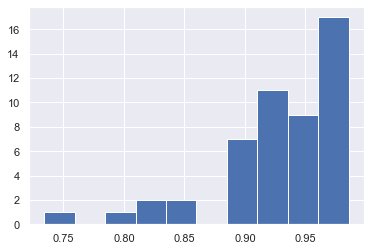

95.0 confidence interval 79.4% and 98.1%


In [76]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [77]:
#Bootstrap confidence level
combined_df = X.join(pd.DataFrame(y))
values = combined_df.values

n_iterations = 1000             # Number of bootstrap samples to create
n_size = 500   

# run bootstrap
stats = list()

for i in range(n_iterations):
   
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
    model = RandomForestRegressor(n_estimators=1000,max_features='log2',min_samples_split=2,bootstrap=False,n_jobs = -1)
    
           
    model.fit(train[:,:-1], train[:,-1])
    # evaluate model
    
    score = model.score(test[:,:-1], test[:,-1])    # caution, overall accuracy score can mislead when classes are imbalanced
    stats.append(score)
    
    if i in [1, 10,50,100,200,500,600,700,800,900]:
        print (i, '   ', score)


1     0.8634037298115063
10     0.8721099103316394
50     0.8484987679253942
100     0.8555484120287926
200     0.8547238619377489
500     0.8824431968415082
600     0.865036045867898
700     0.8396891081641532
800     0.8953114505670348
900     0.8543948961400991


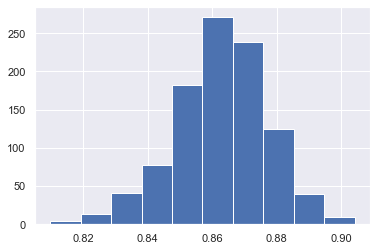

95.0 confidence interval 83.2% and 89.0%


In [78]:
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### Observation:
The Random Forest regressor will give score between 83.2% to 89% for 95% percent of time.

In [81]:
#For best model (Gradientboost, with best hyperparameters), I will use K-fold to see how this model may perform in Production
#K-fold confidence level for best performing model

num_folds = 50
seed = 5

kfold = KFold(n_splits=num_folds)
model = GradientBoostingRegressor(n_estimators=420,
                                  min_samples_split=100,
                                  learning_rate=.1,
                                  max_depth=20                                  
                            )
results = cross_val_score(model, X, y, cv=kfold)

print(results)
print("Accuracy: %.3f%% (%.3f%%)" % (results.mean()*100.0, results.std()*100.0))


[0.89883182 0.96826764 0.86287343 0.93378655 0.90213635 0.86911079
 0.97605758 0.91509386 0.9802522  0.8989639  0.96805828 0.98429569
 0.98890397 0.97979279 0.9579256  0.85590514 0.94809634 0.97844957
 0.94772824 0.98591197 0.95785534 0.91164062 0.95614736 0.76155849
 0.85414832 0.96602917 0.96204205 0.94224123 0.98826491 0.96176473
 0.93861625 0.98632338 0.9530201  0.97859743 0.95534647 0.96731887
 0.95890686 0.92675877 0.91273294 0.95532001 0.9596382  0.97011293
 0.99056614 0.97794754 0.9409128  0.93566638 0.96878514 0.94595065
 0.97402068 0.96790598]
Accuracy: 94.453% (4.380%)


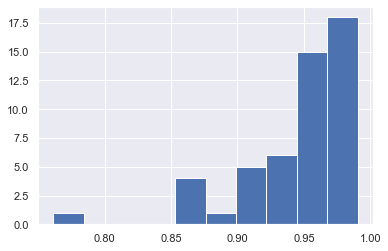

95.0 confidence interval 85.5% and 98.9%


In [82]:
# plot scores
plt.hist(results)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(results, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(results, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

In [83]:
#Bootstrap confidence level
combined_df = X.join(pd.DataFrame(y))
values = combined_df.values

n_iterations = 1000             # Number of bootstrap samples to create
n_size = 500   

# run bootstrap
stats = list()

for i in range(n_iterations):
   
    # prepare train and test sets
    train = resample(values, n_samples=n_size)  # Sampling with replacement 
    test = np.array([x for x in values if x.tolist() not in train.tolist()])  # picking rest of the data not considered in sample
    # fit model
    model = GradientBoostingRegressor(n_estimators=420,
                                  min_samples_split=100,
                                  learning_rate=.1,
                                  max_depth=20
                            ) 
    
           
    model.fit(train[:,:-1], train[:,-1])
    # evaluate model
    
    score = model.score(test[:,:-1], test[:,-1])    # caution, overall accuracy score can mislead when classes are imbalanced
    stats.append(score)
    
    if i in [1, 10,50,100,200,500,600,700,800,900]:
        print (i, '   ', score)


1     0.881461854653971
10     0.8973379555950958
50     0.8963311675505962
100     0.9153432020298082
200     0.904841260786933
500     0.890997038027374
600     0.9013391345898575
700     0.9088899545322817
800     0.8889045380241506
900     0.9106052874783249


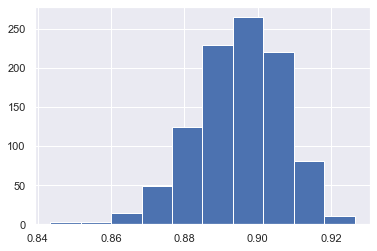

95.0 confidence interval 86.9% and 91.5%


In [84]:
# plot scores
plt.hist(stats)
plt.show()
# confidence intervals
alpha = 0.95                             # for 95% confidence 
p = ((1.0-alpha)/2.0) * 100              # tail regions on right and left .25 on each side indicated by P value (border)
lower = max(0.0, np.percentile(stats, p))  
p = (alpha+((1.0-alpha)/2.0)) * 100
upper = min(1.0, np.percentile(stats, p))
print('%.1f confidence interval %.1f%% and %.1f%%' % (alpha*100, lower*100, upper*100))

#### Observation:
The Gradientboost regressor will give score between 86.9% to 91.5% for 95% percent of time. This the best performing model. 